# Задача №4.
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.
Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
Постройте график, показывающий важность признаков в дереве решений.
Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

## Текстовое описание набора данных 

В качестве набора данных мы будем использовать набор данных по предсказанию поступления в аспирантуру

Данные доступны по ссылке https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
Эта задача является актуальной для людей, собирающихся поступать в аспирантуру, и которым необходимо оценить свои шансы.

Датасет состоит из 1 файла:
- Admission_Predict.csv

Файл содержит следующие колонки:
- GRE Score  - баллы за экзамен GRE для поступления в магистратуру/аспирантуру.
- TOEFL Score - баллы за экзамен TOEFL по английскому.
- University Rating - рейтинг университета.
- SOP - мотивация соискателя
- LOR - сила рекомендательного письма.
- CGPA - средний балл аттестата.
- Research - наличие опыта в исследовательских работах.
- Chance of Admit - шанс приема.
- University - название университета

## Добавляем библиотеки

In [ ]:
#%pip install -q seaborn
#%pip install -q scipy

In [88]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, precision_score
import pandas as pd
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline 
from sklearn.linear_model import SGDClassifier
sns.set(style="ticks")
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score

## Изучение данных

In [10]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,country,country codes
0,1,337,118,4,4.5,4.5,9.65,1,0.92,Great Britain,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,India,2
2,3,316,104,3,3.0,3.5,8.00,1,0.72,India,2
3,4,322,110,3,3.5,2.5,8.67,1,0.80,France,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,India,2


In [11]:
data.shape

(500, 11)

In [12]:
data.keys()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'country',
       'country codes'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
 9   country            500 non-null    object 
 10  country codes      500 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 43.1+ KB


In [14]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,country codes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,1.182000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.928763
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,0.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,2.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,2.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,2.000000


# Подготовка обучающей и тестовой выборки

In [16]:
try:
 data = data.drop(columns=['country codes', 'country'])
except:
    pass

In [17]:
data['Chance of Admit '] = (data['Chance of Admit '] * 100).astype(int)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 33.3 KB


In [71]:
# Признак и цель
X = data[['GRE Score', 'TOEFL Score','Chance of Admit ' , 'Research']]
y = data['University Rating']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 4), (300, 4), (200,), (300,))

# Линейная модель

In [75]:
SGD = SGDClassifier(max_iter=10000)
SGD.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [80]:
f1 = f1_score(y_test, SGD.predict(X_test), average='micro')
precision = precision_score(y_test, SGD.predict(X_test), average='micro')
print("F1 Score: {:.2f},Precision Score: {:.2f}".format(f1, precision))

F1 Score: 0.35,Precision Score: 0.35


# SVM

In [77]:
SVCm = SVC(kernel='rbf')
SVCm.fit(X_train, y_train)

SVC()

In [83]:
f1_SVM = f1_score(y_test, SVCm.predict(X_test), average='micro')
precision_SVM =precision_score(y_test, SVCm.predict(X_test), average='micro')
print("F1 Score: {:.2f},Precision Score: {:.2f}".format(f1_SVM, precision_SVM))

F1 Score: 0.34,Precision Score: 0.34


# Дерево решений

In [85]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [87]:
f1_tree = f1_score(y_test, DT.predict(X_test), average='micro')
precision_tree = precision_score(y_test, DT.predict(X_test), average='micro')
print("F1 Score: {:.2f},Precision Score: {:.2f}".format(f1_tree, precision_tree))

F1 Score: 0.42,Precision Score: 0.42


# Дерево решений даёт лучший результат

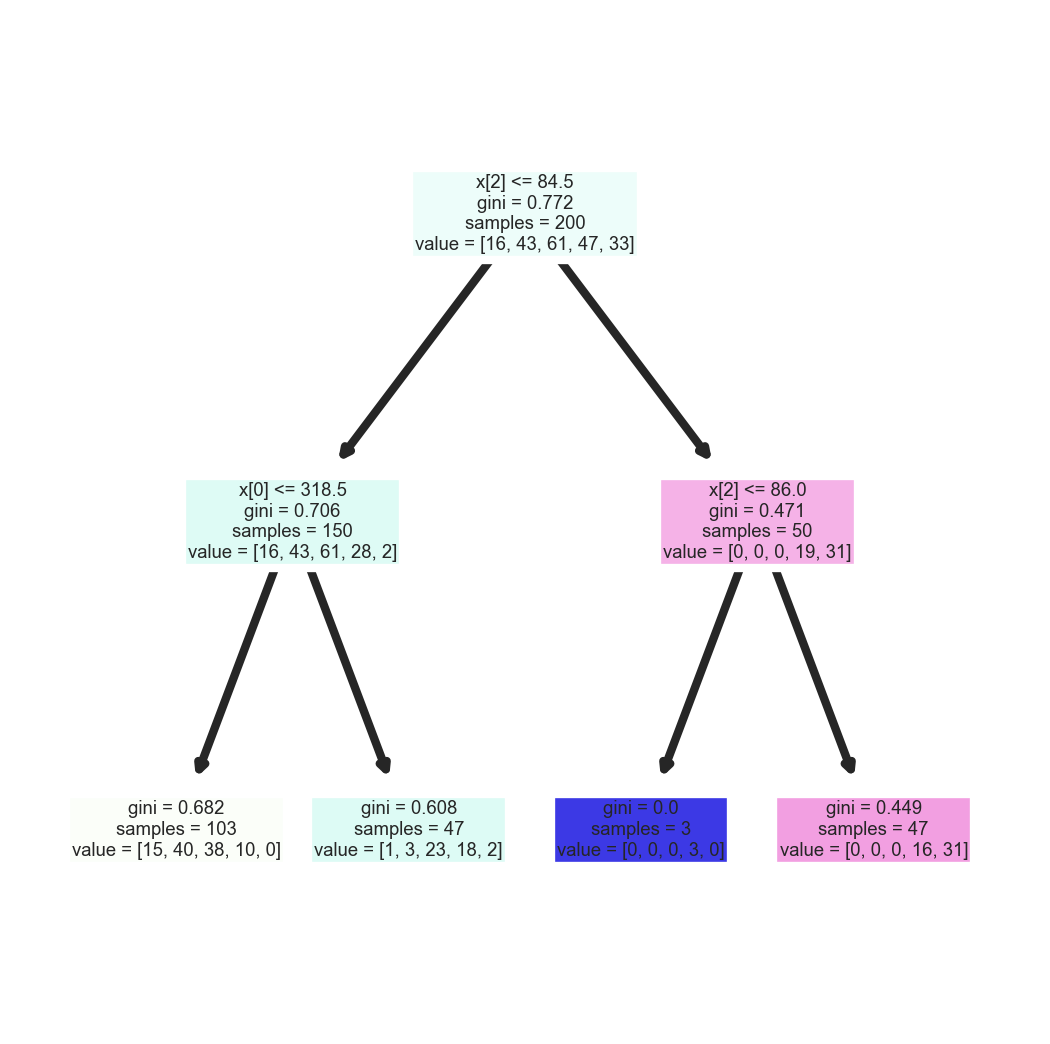

In [94]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=600)
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled = True);

In [95]:
X

,GRE Score,TOEFL Score,Chance of Admit,Research
0,337,118,92,1
1,324,107,76,1
2,316,104,72,1
3,322,110,80,1
4,314,103,65,0
...,...,...,...,...
495,332,108,87,1
496,337,117,96,1
497,330,120,93,1
498,312,103,73,0


In [96]:
y

0      4
1      4
2      3
3      3
4      2
      ..
495    5
496    5
497    5
498    4
499    4
Name: University Rating, Length: 500, dtype: int64